In [20]:
import pandas as pd
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import collections
from scipy.optimize import curve_fit

In [39]:
df = pd.read_csv("correlations.dat", sep='\t', header=None)
df.head()

,0,1,2
0,0,1,0.040663
1,0,2,0.000000
2,0,3,0.000005
3,0,4,0.000000
4,0,5,0.000000


In [22]:
G=nx.Graph()

In [23]:
#G.add_nodes_from(np.arange(np.max(df.loc[:,1])))

In [24]:
for edge in df.loc[:,:].values:
    #G.add_weighted_edges_from([(edge[0],edge[1],edge[2])])
    if edge[2] > 0.3:
        G.add_node(edge[0])
        G.add_node(edge[1])
        G.add_edge(edge[0],edge[1])

In [25]:
N = G.number_of_nodes()
N

12

In [26]:
L = G.number_of_edges()
L

7

In [27]:
N*(N-1)/2

66

In [28]:
options = {'node_color': 'orange', "edge_color":'gray', "font_color": 'white', "font-family":"Helvetica", "font_size":'20', "font_style":"bold", 'node_size': 50, 'width': 0.8, 'with_labels': False}

In [29]:
lay = nx.layout.spring_layout(G, k=0.8)

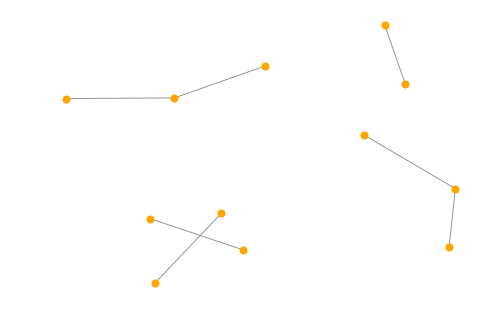

In [30]:
fig = plt.figure()
nx.draw(G, pos=lay, **options)
plt.show()

In [31]:
plt.savefig("graph.png")

<Figure size 432x288 with 0 Axes>

In [32]:
degree_sequence = [d for n, d in G.degree()]  # degree sequence

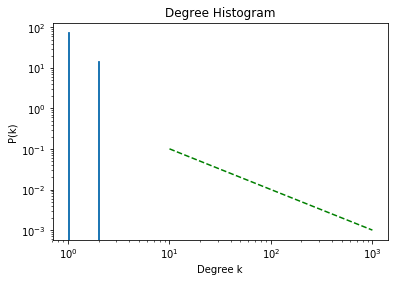

In [33]:
fig = plt.figure()
plt.hist(degree_sequence, density=True, histtype='step', bins=90)
x=np.logspace(1, 3)
plt.plot(x, 1./(x-0.1), 'g--')
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Histogram")
plt.ylabel("P(k)")
plt.xlabel("Degree k")
plt.show()

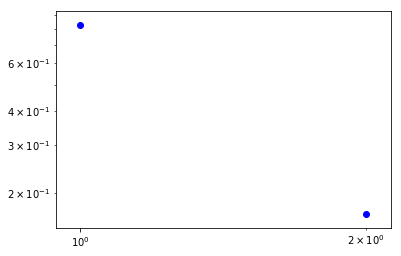

In [38]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
#print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.xscale('log')
plt.yscale('log')
norm = np.sum(cnt)
plt.scatter(deg, np.array(cnt,dtype=float)/norm, color='b', label='degree')
x=np.arange(1, np.max(degree_sequence))
#plt.plot(x, 1./(x-0.1), 'g--')
plt.show()
fig.savefig("degree_distribution.png")

In [35]:
def fitfunc(x, alpha, c):
    return np.power(x,alpha)*(10**c)

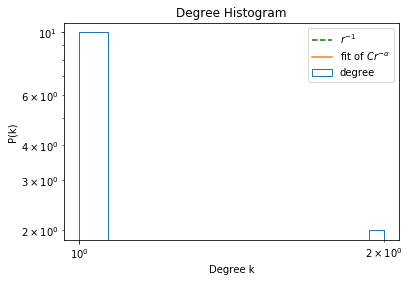

In [36]:
plt.figure()
plt.hist(deg, weights=cnt,  histtype='step',bins=15, label='degree')
x=np.arange(10, np.max(degree_sequence))
plt.plot(x, 1./(x-0.01)*(10**3), 'g--', label='$r^{-1}$')
popt, pcov = curve_fit(fitfunc, deg, cnt, bounds=([-1.1,3], [-0.5,10]))
plt.plot(x, fitfunc(x, *popt), label='fit of $C r^{-\\alpha}$')
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Histogram")
plt.ylabel("P(k)")
plt.xlabel("Degree k")
plt.legend()
plt.show()

In [37]:
popt

array([-1.1,  3. ])